In [1]:
# IMPORTS

import os
import env

import pandas as pd
from pydataset import data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from math import sqrt
from scipy import stats

# import our own acquire module
import acquire
import prepare


# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from prepare import my_train_test_split, telco_training_validate_testing

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")


In [2]:
# obtaining the prepared Telco dataset.

telco_df = acquire.get_telco_data(env.sql_connexion)
tidy_telco = prepare.prep_telco(telco_df)

In [3]:
# splitting into train-validate-test


train, validate, test = my_train_test_split(tidy_telco, target = 'churn_Yes')

train.shape, validate.shape, test.shape


((4225, 31), (1409, 31), (1409, 31))

**This will use the Chi-Squared statistical test to explore Countplot 1 [customer age (Senior Citizens vs non-Senior Citizens) has an influence in churn rate].**  

- $H_{0}$ (Null Hypothesis): There is no relationship between being a Senior Citizen customer and customer churn. 

- $H_{a}$ (Alternative Hypothesis): There is a relationship between being a Senior Citizen customer and customer churn. 


The chi2_contingency function returns 4 items (in this order):

    1. The test statistic: 𝜒2
    2. The p-value: the probability of seeing these proportions by chance
    3. The degrees of freedom: equivalent to sample size minus 1
    4. The contingency table of the expected values, which represents what the values would be if everything was proportional and there was no relationship between the 2 variables.



<AxesSubplot:xlabel='senior_citizen', ylabel='count'>

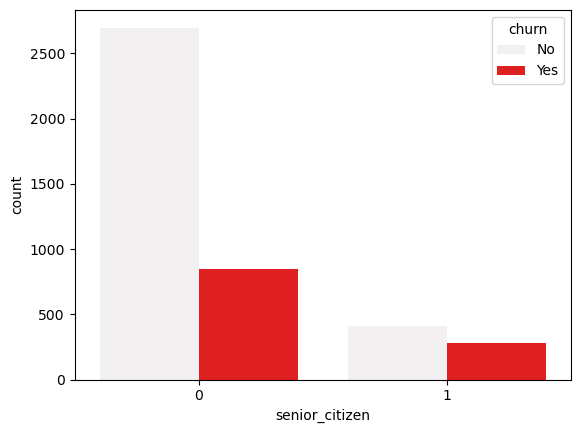

In [4]:
# COUNTPLOT 1 : customer churn and senior citizen

sns.countplot(x = train.senior_citizen, hue = train.churn, color = 'red')


In [11]:
## COUNTPLOT 1

# observed crosstab of senior_citizen (0, 1) and churn (no, yes)

# crosstab is the number of observations in each location of the table

observed_sc_ch = pd.crosstab(train.senior_citizen, train.churn)
observed_sc_ch

churn,No,Yes
senior_citizen,,
0,2697,844
1,407,277


In [12]:
## COUNTPLOT 1

## run the chi2_contingency on senior_citizen and churn based on the crosstab

chi2_sc_ch, p_sc_ch, degf_sc_ch, expected_sc_ch = stats.chi2_contingency(observed_sc_ch)

chi2_sc_ch, p_sc_ch, degf_sc_ch, expected_sc_ch

# expected = expected contingency table

(80.79361466512287,
 2.505662983276272e-19,
 1,
 array([[2601.48260355,  939.51739645],
        [ 502.51739645,  181.48260355]]))

In [61]:
## COUNTPLOT 1

α = 0.05

# print 'Observed Values' followed by a new line
print('Observed Values For Senior Citizens And Churn :\n')


# print the values from the 'observed' dataframe
print(observed_sc_ch.values)

print('')


# print -.-.-.-.- and then a new line, 'Expected Values', followed by another new line
print('-.-.-.-.-\n')
print('Expected Values For Senior Citizens And Churn :\n')


# print the expected values array
print(expected_sc_ch.astype(int))
# this turns the floats into integers, for readability

print('')

# print a new line
print('-.-.-.-.-\n')


# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2_sc_ch:.4f}') 


# print the p-value, formatted to a float with 4 digits {p:.4f}. 
print(f'p-value = {p_sc_ch:.4f}')

print('')

print('-.-.-.-.-\n')

print(f'Is the p-value < α ?', p_sc_ch < α)

# We know that the Expected values are not close to the Observed values due to the p-value being lower than α.

Observed Values For Senior Citizens And Churn :

[[2697  844]
 [ 407  277]]

-.-.-.-.-

Expected Values For Senior Citizens And Churn :

[[2601  939]
 [ 502  181]]

-.-.-.-.-

chi^2 = 80.7936
p-value = 0.0000

-.-.-.-.-

Is the p-value < α ? True


**Takeaways, COUNTPLOT 1 :**  
Though the Observed values for Countplot 1 appear to be relatively close to the Expected values in the contingency tables, the Chi-Squared test indicates that there is some relationship between being a senior citizen and customer churn, due to the extremely low p-value. We, thus, reject the null hypothesis.

**This will use the Chi-Squared statistical test to explore Countplot 3, whether purchasing tech support has an influence on churn rate.**  

- $H_{0}$ (Null Hypothesis): There is no relationship between purchasing tech support and customer churn. 

- $H_{a}$ (Alternative Hypothesis): There is a relationship between purchasing tech support and customer churn. 


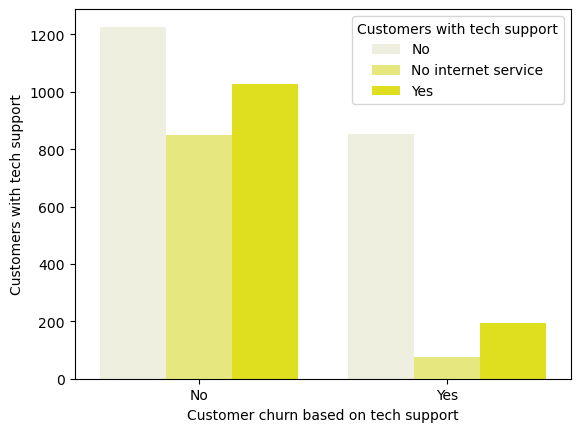

In [16]:
# COUNTPLOT 3 : tech_support and churn.

tech = sns.countplot(x = train.churn, hue = train.tech_support, color = 'yellow')

tech.set(ylabel = 'Customers with tech support', xlabel = 'Customer churn based on tech support')

plt.legend(loc = 'upper right', title = 'Customers with tech support')

In [52]:
## COUNTPLOT 3

# observed crosstab of tech_support (no, no internet service, yes) and churn (no, yes)

# crosstab is the number of observations in each location of the table

observed_ts_ch = pd.crosstab(train.tech_support, train.churn)
observed_ts_ch

churn,No,Yes
tech_support,,
No,1227,852
No internet service,849,74
Yes,1028,195


In [53]:
## COUNTPLOT 3

## run the chi2_contingency on tech_support and churn based on the crosstab

chi2_ts_ch, p_ts_ch, degf_ts_ch, expected_ts_ch = stats.chi2_contingency(observed_ts_ch)

chi2_ts_ch, p_ts_ch, degf_ts_ch, expected_ts_ch


(455.3210599885817,
 1.3436559397518983e-99,
 2,
 array([[1527.38840237,  551.61159763],
        [ 678.10461538,  244.89538462],
        [ 898.50698225,  324.49301775]]))

In [60]:
## COUNTPLOT 3

α = 0.05

# print 'Observed Values' followed by a new line
print('Observed Values For Tech Support And Churn :\n')


# print the values from the 'observed' dataframe
print(observed_ts_ch.values)

print('')

# print -.-.-.-.- and then a new line, 'Expected Values', followed by another new line
print('-.-.-.-.-\n')
print('Expected Values For Tech Support And Churn :\n')


# print the expected values array
print(expected_ts_ch.astype(int))

print('')

print('-.-.-.-.-\n')


# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2_ts_ch:.4f}') 


# print the p-value, formatted to a float with 4 digits {p:.4f}. 
print(f'p-value = {p_ts_ch:.4f}')

print('')

print('-.-.-.-.-\n')

print(f'Is the p-value < α ?', p_ts_ch < α)

# We know that the Expected values are not close to the Observed values due to the p-value being lower than α.

Observed Values For Tech Support And Churn :

[[1227  852]
 [ 849   74]
 [1028  195]]

-.-.-.-.-

Expected Values For Tech Support And Churn :

[[1527  551]
 [ 678  244]
 [ 898  324]]

-.-.-.-.-

chi^2 = 455.3211
p-value = 0.0000

-.-.-.-.-

Is the p-value < α ? True


**Takeaways, COUNTPLOT 3 :**  
The Observed values for Countplot 3 appear very different from the Expected values in the contingency tables ; the Chi-Square test indicates that there is a relationship between customer purchase of tech support and customer churn, due to the extremely low p-value. We, thus, reject the null hypothesis.

**This will use the Chi-Square statistical test to explore Countplot 2, whether use of paperless billing has an influence on churn rate.**  

- $H_{0}$ (Null Hypothesis): There is no relationship between use of paperless billing and customer churn. 

- $H_{a}$ (Alternative Hypothesis): There is a relationship between use of paperless billing and customer churn. 


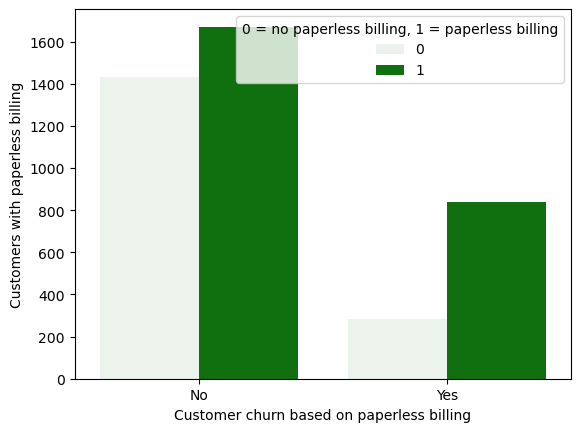

In [55]:
# COUNTPLOT 2 : churn vs paperless billing

paperless = sns.countplot(x = train.churn, hue = train.paperless_billing_Yes, color = 'green')

paperless.set(ylabel = 'Customers with paperless billing', xlabel = 'Customer churn based on paperless billing')

plt.legend(loc = 'upper right', title = '0 = no paperless billing, 1 = paperless billing')


# 0 = no paperless billing, 1 = paperless billing

In [56]:
## COUNTPLOT 2

# observed crosstab of paperless billing (0 = no, 1 = yes) and churn (no, yes)

# crosstab is the number of observations in each location of the table

observed_pb_ch = pd.crosstab(train.paperless_billing_Yes, train.churn)
observed_pb_ch

churn,No,Yes
paperless_billing_Yes,,
0,1433,283
1,1671,838


In [57]:
## COUNTPLOT 2

## run the chi2_contingency on tech_support and churn based on the crosstab

chi2_pb_ch, p_pb_ch, degf_pb_ch, expected_pb_ch = stats.chi2_contingency(observed_pb_ch)

chi2_pb_ch, p_pb_ch, degf_pb_ch, expected_pb_ch

(148.58446697144495,
 3.5348504574964642e-34,
 1,
 array([[1260.70153846,  455.29846154],
        [1843.29846154,  665.70153846]]))

In [59]:
## COUNTPLOT 2

α = 0.05

# print 'Observed Values' followed by a new line
print('Observed Values For Paperless Billing And Churn :\n')


# print the values from the 'observed' dataframe
print(observed_pb_ch.values)

print('')


# print -.-.-.-.- and then a new line, 'Expected Values', followed by another new line
print('-.-.-.-.-\n')
print('Expected Values For Paperless Billing And Churn :\n')


# print the expected values array
print(expected_pb_ch.astype(int))
# this turns the floats into integers, for readability

print('')

# print a new line
print('-.-.-.-.-\n')


# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2_pb_ch:.4f}') 


# print the p-value, formatted to a float with 4 digits {p:.4f}. 
print(f'p-value = {p_pb_ch:.4f}')

print('')

print('-.-.-.-.-\n')

print(f'Is the p-value < α ?', p_pb_ch < α)

# We know that the Expected values are not close to the Observed values due to the p-value being lower than α.

Observed Values For Paperless Billing And Churn :

[[1433  283]
 [1671  838]]

-.-.-.-.-

Expected Values For Paperless Billing And Churn :

[[1260  455]
 [1843  665]]

-.-.-.-.-

chi^2 = 148.5845
p-value = 0.0000

-.-.-.-.-

Is the p-value < α ? True


**Takeaways, COUNTPLOT 2 :**  
The Observed values for Countplot 2 appear very different from the Expected values in the contingency tables ; the Chi-Square test indicates that there is a relationship between customer use of paperless billing and customer churn, due to the extremely low p-value. We, thus, reject the null hypothesis.